In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
v = pd.read_csv('/content/wine_data (1).csv')


In [ ]:
v

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
v.columns = v.iloc[0]         # Row 0 ko header bana do
v = v.drop(index=0)           # Row 0 ko hata do
v = v.reset_index(drop=True)  # Index reset karo (0 se start ho)


In [ ]:
v = pd.read_csv('/content/wine_data (1).csv' , usecols = [0,1,2])
v.columns = ['Class label' , 'Alcohol' , 'Malic acid']

In [ ]:
v

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [ ]:
print(v['Alcohol'].dtype)
print(v['Alcohol'].unique()[:5])  # First 5 unique values


float64
[14.23 13.2  13.16 14.37 13.24]


In [ ]:
 # this function is  convert object value to flaot or int because kdeplot do not work over object
  # or string data type
v['Alcohol'] = pd.to_numeric(v['Alcohol'], errors='coerce')




<Axes: xlabel='Alcohol', ylabel='Density'>

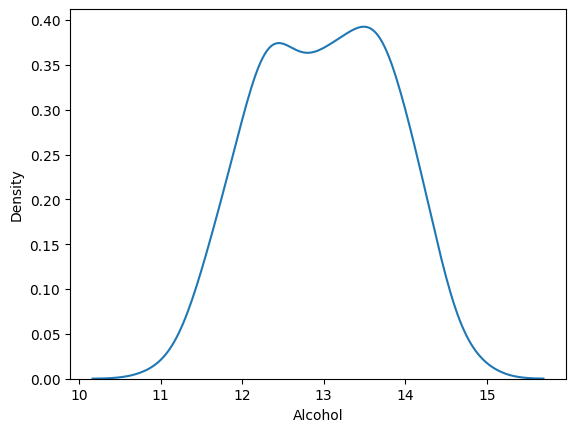

In [ ]:
sns.kdeplot( v['Alcohol'])

above graph telling that in wines  the qauntity of alochol in wine is peak at 9 to 10  means alcohal is in 9 to 10 perecnt in wines and ...also telling that in wines the  the qauntity  of alcohal mostly is in  9 to 11 ... density represent means that between 9 to 12 most concentration of wine quantiuty are at this point ..... between 9 to 11  ...MEANS MOTLY frequents are here

In [ ]:
v['Malic acid'] = pd.to_numeric(v['Malic acid'], errors='coerce')

<Axes: xlabel='Malic acid', ylabel='Density'>

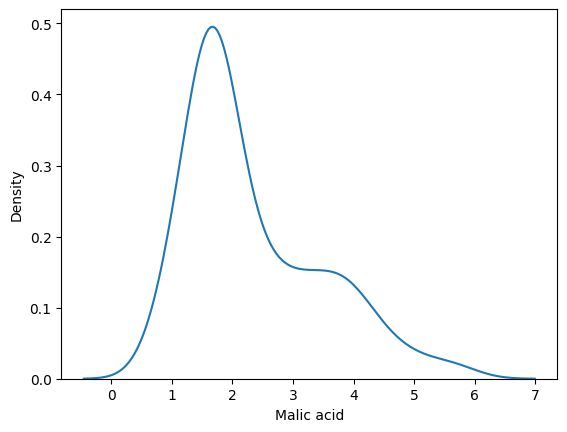

In [ ]:
sns.kdeplot(v['Malic acid'])

"Most wines are clustered around a fixed acidity of approximately 8."
"This means that wines most frequently have a fixed acidity value close to 8."

In [ ]:

print(v['Class label'].unique())


[1 2 3]


In [ ]:
color_dict = {1: 'red', 3: 'green' , 2 :'blue'}

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

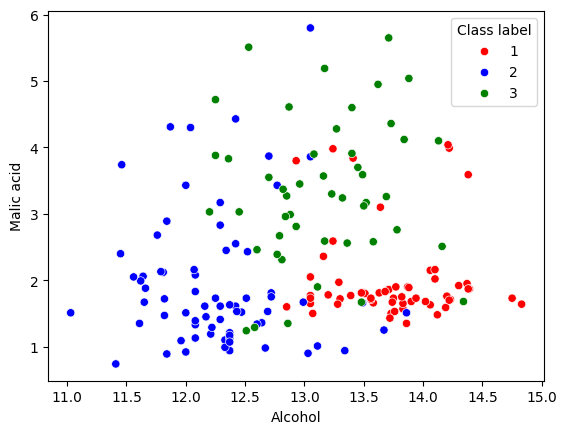

In [ ]:
sns.scatterplot( x = v['Alcohol'] , y =  v['Malic acid'] , hue = v['Class label'] , palette = color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(v.drop('Class label' , axis = 1),
                                             v['Class label'] , test_size = 0.3, random_state =0 )


In [ ]:
x_train.shape , x_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit the scaler to the trainset , it will learn the parameters
scaler.fit(x_train)
#transform train and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

since when we use sklearn  classes then  sklearn will convert  dataframe into numpy array  .......that why use below to convert numpy into dataframe ...

in  pd we cant replace v ..becaise v is my dataframe not pandas module ...

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

In [ ]:
np.round(x_train.describe() , 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


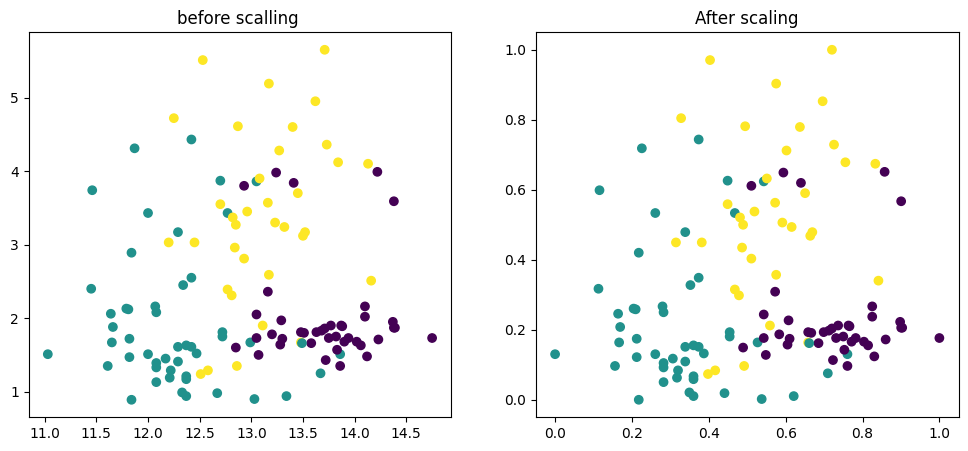

In [ ]:
fig , (ax1 ,ax2) = plt.subplots(ncols = 2 , figsize = (12,5))
ax1.scatter(x_train['Alcohol'] ,x_train['Malic acid'] , c = y_train)
ax1.set_title("before scalling ")
ax2.scatter(x_train_scaled['Alcohol'] ,x_train_scaled['Malic acid'] , c = y_train)
ax2.set_title("After scaling")
plt.show()


 by ..........above we could see that after normalisation my values is  lies between 0 to 1 .....

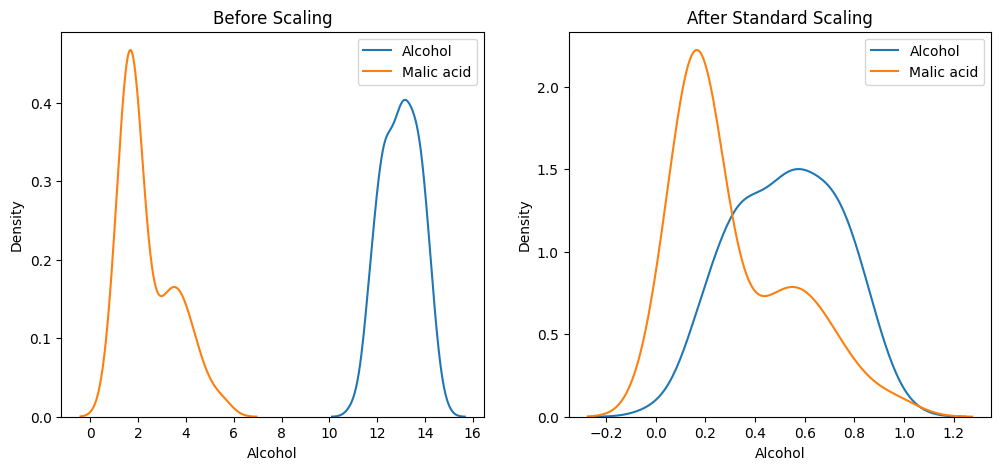

In [ ]:


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1, label='Alcohol')
sns.kdeplot(x_train['Malic acid'], ax=ax1, label='Malic acid')
ax1.legend()

# After scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2, label='Alcohol')
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2, label='Malic acid')
ax2.legend()

plt.show()
